In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
from zipfile import ZipFile 

In [5]:
df2 = pd.read_json("./train.json")
# df2.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low


In [3]:
# Extract year, month, day, hour from created column
# print(df2['created'].dtype)
df2['created'] = pd.to_datetime(df2['created'])
# print(df2['created'].dtype)
df2['year'] = df2['created'].dt.year
df2['month'] = df2['created'].dt.month
df2['day'] = df2['created'].dt.day
df2['hour'] = df2['created'].dt.hour
# df2.head(2)

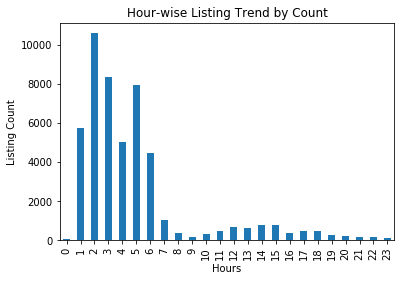

Top 5 busiest hours of postings


,Hour,Count
2,2,10596
3,3,8318
5,5,7954
1,1,5749
4,4,5021


In [4]:
hour_counts = df2['hour'].value_counts().sort_index()
hour_counts.plot.bar(x="Hour", y="Count")
plt.xlabel('Hours')
plt.ylabel('Listing Count')
plt.title('Hour-wise Listing Trend by Count')
plt.show()

formatted_hour_counts = hour_counts.reset_index()
formatted_hour_counts.columns = ['Hour', 'Count']

print("Top 5 busiest hours of postings")
formatted_hour_counts.sort_values(by=['Count'], ascending=False).head(5)